In [1]:
import pandas as pd
import yaml
import pickle
import numpy as np
import keras
from keras import models
from keras import layers

In [2]:
with open('C:/Users/Sidney/LiveProject/AirBnB_config.yml', 'r') as file:
    config=yaml.safe_load(file)

In [3]:
config

{'general': {'load_from_scratch': False,
  'save_raw_dataframe': False,
  'save_transformed_dataframe': False,
  'remove_bad_values': True},
 'columns': {'categorical': ['neighbourhood_group',
   'neighbourhood',
   'room_type'],
  'continuous': ['minimum_nights',
   'number_of_reviews',
   'reviews_per_month',
   'calculated_host_listings_count'],
  'date': ['last_review'],
  'text': ['name', 'host_name'],
  'label': ['price']},
 'bounding_box': {'max_long': -73.70018092,
  'max_lat': 40.91617849,
  'min_long': -74.25909008,
  'min_lat': 40.47739894},
 'newark_bounding_box': {'max_long': -74.11278706,
  'max_lat': 40.67325015,
  'min_long': -74.25132408,
  'min_lat': 40.78813864},
 'geo_columns': ['latitude', 'longitude'],
 'file_names': {'input_csv': 'AB_NYC_2019.csv',
  'pickled_input_dataframe': 'C:/Users/Sidney/OneDrive/Documents/LiveProject/AB_NYC_2021.pkl',
  'pickled_output_dataframe': 'AB_NYC_23_May_2021.pkl'}}

In [4]:
config.keys()

dict_keys(['general', 'columns', 'bounding_box', 'newark_bounding_box', 'geo_columns', 'file_names'])

In [5]:
file_names=config.get('file_names')

In [6]:
file_names

{'input_csv': 'AB_NYC_2019.csv',
 'pickled_input_dataframe': 'C:/Users/Sidney/OneDrive/Documents/LiveProject/AB_NYC_2021.pkl',
 'pickled_output_dataframe': 'AB_NYC_23_May_2021.pkl'}

In [7]:
ip_data_frame=file_names.get('pickled_input_dataframe')

In [8]:
infile=open(ip_data_frame, 'rb')

In [9]:
df=pickle.load(infile)

In [10]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [11]:
df['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

Look at neighbourhood column - how many neighbourhoods?, correlation to price?

In [12]:
df['neighbourhood'].value_counts(ascending=True)

Rossville                1
Woodrow                  1
Willowbrook              1
Richmondtown             1
Fort Wadsworth           1
                      ... 
Upper West Side       1971
Bushwick              2465
Harlem                2658
Bedford-Stuyvesant    3714
Williamsburg          3920
Name: neighbourhood, Length: 221, dtype: int64

In [13]:
neighbourhood_list=list(df['neighbourhood'].value_counts().index)

In [14]:
neighbourhood_list

['Williamsburg',
 'Bedford-Stuyvesant',
 'Harlem',
 'Bushwick',
 'Upper West Side',
 "Hell's Kitchen",
 'East Village',
 'Upper East Side',
 'Crown Heights',
 'Midtown',
 'East Harlem',
 'Greenpoint',
 'Chelsea',
 'Lower East Side',
 'Astoria',
 'Washington Heights',
 'West Village',
 'Financial District',
 'Flatbush',
 'Clinton Hill',
 'Long Island City',
 'Prospect-Lefferts Gardens',
 'Park Slope',
 'East Flatbush',
 'Fort Greene',
 'Murray Hill',
 'Kips Bay',
 'Flushing',
 'Ridgewood',
 'Greenwich Village',
 'Sunset Park',
 'Chinatown',
 'Sunnyside',
 'SoHo',
 'Prospect Heights',
 'Morningside Heights',
 'Gramercy',
 'Ditmars Steinway',
 'Theater District',
 'South Slope',
 'Nolita',
 'Inwood',
 'Gowanus',
 'Elmhurst',
 'Woodside',
 'Carroll Gardens',
 'Jamaica',
 'East New York',
 'Jackson Heights',
 'East Elmhurst',
 'Boerum Hill',
 'Tribeca',
 'Kensington',
 'Sheepshead Bay',
 'Windsor Terrace',
 'Brooklyn Heights',
 'Canarsie',
 'Forest Hills',
 'Bay Ridge',
 'Borough Park',
 'C

In [15]:
df.groupby('neighbourhood_group')['neighbourhood'].value_counts()

neighbourhood_group  neighbourhood
Bronx                Kingsbridge      70
                     Fordham          63
                     Longwood         62
                     Mott Haven       60
                     Concourse        50
                                      ..
Staten Island        New Dorp          1
                     Richmondtown      1
                     Rossville         1
                     Willowbrook       1
                     Woodrow           1
Name: neighbourhood, Length: 221, dtype: int64

In [16]:
def convert_category (heading):
    dict={}
    category_list=list(df[heading].value_counts().index)
    for i in range(len(category_list)):
        dict1={category_list[i]: i+1}
        dict.update(dict1)
    return dict    

In [17]:
z=config.get('columns')
continuous=z.get('continuous')
categorical=z.get('categorical')
label=z.get('label')

In [18]:
New_cat_list=[]
for category in categorical:
    category_dict=convert_category(category)
    df['N'+category]=df[category].apply(lambda x: category_dict.get(x)/len(category_dict))
    New_cat_list.append('N'+category)
#created new, normalized numerical columns for categorical variables
#normalized numerical categorical columns are Nneighbourhood_group, Nneighbourhood, Nroom_type

In [19]:
New_cat_list

['Nneighbourhood_group', 'Nneighbourhood', 'Nroom_type']

In [20]:
continuous

['minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count']

For continuous columns you want a mean of zero and a standard deviation of 1

In [21]:
New_cont_list=[]
for conts in continuous:
    df['N'+conts] = (df[conts] - df[conts].mean()) / df[conts].std()
    New_cont_list.append('N'+conts)

In [22]:
New_cont_list

['Nminimum_nights',
 'Nnumber_of_reviews',
 'Nreviews_per_month',
 'Ncalculated_host_listings_count']

In [23]:
def binary_label(price):
    if price <=average_price:
        return 0
    else:
        return 1

In [24]:
average_price=np.average(df[label])

In [25]:
average_price

152.7206871868289

In [26]:
df['Nprice']=df['price'].apply(lambda x: binary_label(x))

In [27]:
New_label=['Nprice']

Create new df with normalized categorical and continuous data

In [28]:
Ndf=df[New_cat_list+New_cont_list+New_label]

In [29]:
Ndf.head()

,Nneighbourhood_group,Nneighbourhood,Nroom_type,Nminimum_nights,Nnumber_of_reviews,Nreviews_per_month,Ncalculated_host_listings_count,Nprice
0,0.4,0.239819,0.666667,-0.293993,-0.320410,-0.551505,-0.034716,0
1,0.2,0.045249,0.333333,-0.293993,0.487660,-0.445075,-0.156103,1
2,0.2,0.013575,0.666667,-0.196482,-0.522428,-0.682979,-0.186450,0
3,0.4,0.090498,0.333333,-0.293993,5.538099,2.221955,-0.186450,0
4,0.2,0.049774,0.333333,0.144805,-0.320410,-0.620372,-0.186450,0


Must now convert the new df to a numpy array

In [30]:
dataset=np.array(Ndf)

In [31]:
dataset

array([[ 0.4       ,  0.239819  ,  0.66666667, ..., -0.5515053 ,
        -0.03471607,  0.        ],
       [ 0.2       ,  0.04524887,  0.33333333, ..., -0.44507455,
        -0.15610285,  1.        ],
       [ 0.2       ,  0.01357466,  0.66666667, ..., -0.68297858,
        -0.18644954,  0.        ],
       ...,
       [ 0.2       ,  0.01357466,  0.33333333, ..., -0.68297858,
        -0.18644954,  0.        ],
       [ 0.2       ,  0.02714932,  1.        , ..., -0.68297858,
        -0.03471607,  0.        ],
       [ 0.2       ,  0.02714932,  0.66666667, ..., -0.68297858,
        -0.18644954,  0.        ]])

In [32]:
dataset.shape

(48895, 8)

In [33]:
data=dataset[:,:-1]

In [34]:
label=dataset[:,-1]

In [35]:
data.shape

(48895, 7)

In [36]:
label.shape

(48895,)

In [37]:
label

array([0., 1., 0., ..., 0., 0., 0.])

data is a 2D tensor, label is a 1D tensor
Must decide on test data and validation data, how should I do this??

In [38]:
model=models.Sequential()
model.add(layers.Dense(12, input_dim=len(New_cat_list+New_cont_list), activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Separate 10,000 rows as a validation dataset

In [39]:
val_data=data[:10000]
test_data=data[10000:]

In [40]:
val_data.shape

(10000, 7)

In [41]:
val_label=label[:10000]
test_label=label[10000:]

In [42]:
val_label.shape

(10000,)

In [43]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [44]:
callbacks_list=[keras.callbacks.ModelCheckpoint(filepath='C:/Users/Sidney/LiveProject/Rob_model',
                                              monitor='val_loss', save_best_only=True),
               keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10)]

In [45]:
history=model.fit(test_data,test_label, epochs=20, batch_size=512, callbacks=callbacks_list,
                  validation_data=(val_data, val_label))

Epoch 1/20
68/76 [=========================>....] - ETA: 0s - loss: 0.6176 - acc: 0.7012WARNING:tensorflow:From C:\Users\Sidney\anaconda3\envs\DeepLearning\lib\site-packages\tensorflow\python\training\tracking\tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: C:/Users/Sidney/LiveProject\Rob_model\assets
76/76 [==============================] - 2s 21ms/step - loss: 0.6140 - acc: 0.7027 - val_loss: 0.6357 - val_acc: 0.6748
Epoch 2/20
76/76 [==============================] - 1s 14ms/step - loss: 0.5678 - acc: 0.7163 - val_loss: 0.6272 - val_acc: 0.6692
Epoch 3/20
76/76 [==============================] - 1s 16ms/step - loss: 0.5457 - acc:

In [46]:
import matplotlib.pyplot as plt

In [47]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

In [48]:
epochs=range(1,len(acc)+1)

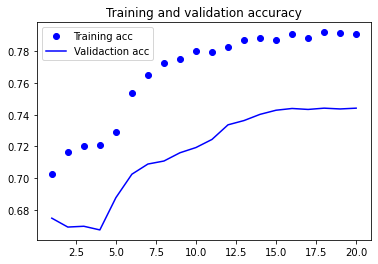

In [49]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs,val_acc, 'b', label='Validaction acc')
plt.title('Training and validation accuracy')
plt.legend()

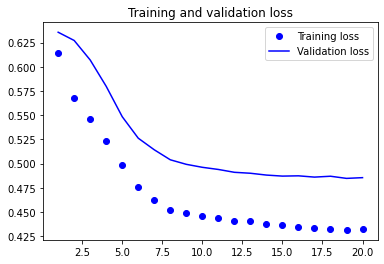

In [50]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()